In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import numpy
import numpy as np
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from keras import optimizers
from keras import regularizers
import tensorflow as tf
import cv2
from keras import backend as K
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from skimage.util.shape import view_as_blocks
from keras import utils

In [4]:
srm_weights = np.load('/content/drive/MyDrive/Dataset/SRM_Kernels.npy')
biasSRM=numpy.ones(30)
print (srm_weights.shape)
################################################## TLU ACTIVATION FUNCTION
T3 = 3;
def Tanh3(x):
    tanh3 = K.tanh(x)*T3
    return tanh3

(5, 5, 1, 30)


In [5]:
def GBRAS_Net():
    tf.keras.backend.clear_session()
    #Inputs
    inputs = tf.keras.Input(shape=(256,256,1), name="input_1")
    #Layer 1
    layers = tf.keras.layers.Conv2D(30, (5,5), weights=[srm_weights,biasSRM], strides=(1,1), padding='same',
                                    trainable=False, activation=Tanh3, use_bias=True)(inputs)
    layers1 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                 fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 2
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers1)
    layers = tf.keras.layers.SeparableConv2D(30,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 3
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers)
    layers = tf.keras.layers.SeparableConv2D(30,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers)
    layers2 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                 fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    skip1 =   tf.keras.layers.Add()([layers1, layers2])
    #Layer 4
    layers = tf.keras.layers.Conv2D(30, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(skip1)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 5
    layers = tf.keras.layers.Conv2D(30, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 6
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 7
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers3 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                 fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 8
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers3)
    layers = tf.keras.layers.SeparableConv2D(60,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 9
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers)
    layers = tf.keras.layers.SeparableConv2D(60,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers)
    layers4 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                 fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    skip2 =   tf.keras.layers.Add()([layers3, layers4])
    #Layer 10
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(skip2)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 11
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 12
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 13
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 14
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 15
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 16
    layers = tf.keras.layers.Conv2D(30, (1,1), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 17
    layers = tf.keras.layers.Conv2D(2, (1,1), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True,
                                                fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 18
    layers = tf.keras.layers.GlobalAveragePooling2D(data_format="channels_last")(layers)
    #Layer 19
    predictions = tf.keras.layers.Softmax(axis=1)(layers)
    #Model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)


    #Optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    print ("Model GBRAS-Net Generated")
    #Model compilation
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
path_log_base = '/content/drive/MyDrive/Dataset/logs'
path_img_base = '/content/drive/MyDrive/Dataset/images'
if not os.path.exists(path_log_base):
    os.makedirs(path_log_base)
if not os.path.exists(path_img_base):
    os.makedirs(path_img_base)

In [7]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_accuracy:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=False, mode='max')
    model.reset_states()

    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    print("Starting the training...")
    history=model.fit(X_train, y_train, epochs=epochs,
                      callbacks=[tensorboard,checkpoint],
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=2)

    metrics = model.evaluate(X_test, y_test, verbose=0)

    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)

    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [8]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= []
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'Tanh3':Tanh3})
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y Accuracy={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)
            LossTest.append(BandLossTest)

            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename

    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y Accuracy={B_accuracy:0.4f}'+'\n')

In [9]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% total epochs
        index, value = numbers_sort[i]
        print("Test Accuracy {}, epoch:{}\n".format(value, index+1))

    print("")

    numbers=history.history['accuracy']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% total epochs
        index, value = numbers_sort[i]
        print("Train Accuracy {}, epoch:{}\n".format(value, index+1))

    print("")

    numbers=history.history['val_accuracy']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% total epochs
        index, value = numbers_sort[i]
        print("Validation Accuracy {}, epoch:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['accuracy'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_accuracy'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('Accuracy Vs Epoch')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        plt.savefig(path_img_base+'/Accuracy_GBRAS_Net_'+model_Name+'.eps', format='eps')
        plt.savefig(path_img_base+'/Accuracy_GBRAS_Net_'+model_Name+'.svg', format='svg')
        plt.savefig(path_img_base+'/Accuracy_GBRAS_Net_'+model_Name+'.pdf', format='pdf')
        plt.show()

        plt.figure(figsize=(10, 10))
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        plt.savefig(path_img_base+'/Loss_GBRAS_Net_'+model_Name+'.eps', format='eps')
        plt.savefig(path_img_base+'/Loss_GBRAS_Net_'+model_Name+'.svg', format='svg')
        plt.savefig(path_img_base+'/Loss_GBRAS_Net_'+model_Name+'.pdf', format='pdf')
        plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical
import keras
from tensorflow.python.keras.utils import np_utils
from keras.utils import to_categorical

In [11]:
n=256
def load_images(path_pattern):
    files=glob.glob(path_pattern)
    X=[]
    for f in sorted(files):
        I = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        patches = view_as_blocks(I, (n, n))
        for i in range(patches.shape[0]):
            for j in range(patches.shape[1]):
                X.append( [ patches[i,j] ] )
    X=numpy.array(X)
    return X

main_path= '/content/drive/MyDrive/Dataset/ALASKA2'
pathc = main_path
paths = main_path+'/uerd'

Xc_ = load_images(pathc+'/cover/*.pgm') ##COVER IMAGES
Xs_ = load_images(paths+'/stego/*.pgm') ##STEGO IMAGES
X_  = (numpy.vstack((Xc_, Xs_)))
Xt_ = (numpy.hstack(([0]*len(Xc_), [1]*len(Xs_))))
Xt_ = np_utils.to_categorical(Xt_, 2)
X_  = np.rollaxis(X_,1,4)  #channel axis shifted to last axis

print("Total image data and labels",X_.shape,Xt_.shape)
#Cover Image 10000 ##Train 0-8000 image ##Valid 8000-9000 image ##Test 9000-10000 image
X_train =  np.concatenate([X_[0:8000], X_[10000:18000]],axis=0)
y_train = np.concatenate([Xt_[0:8000],Xt_[10000:18000]],axis=0)
X_valid =  np.concatenate([X_[8000:9000], X_[18000:19000]],axis=0)
y_valid = np.concatenate([Xt_[8000:9000],Xt_[18000:19000]],axis=0)
X_test  =  np.concatenate([X_[9000:10000], X_[19000:20000]],axis=0)
y_test  = np.concatenate([Xt_[9000:10000],Xt_[19000:20000]],axis=0)
#Controled randomized data for training
X_dat0, X_dat1, y_dat0, y_dat1 = train_test_split(X_train, y_train, test_size=0.50, random_state=64)
X_train = np.concatenate([X_dat0,X_dat1],axis=0)
y_train = np.concatenate([y_dat0,y_dat1],axis=0)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

Total image data and labels (20000, 256, 256, 1) (20000, 2)
(16000, 256, 256, 1)
(16000, 2)
(2000, 256, 256, 1)
(2000, 2)
(2000, 256, 256, 1)
(2000, 2)


cover


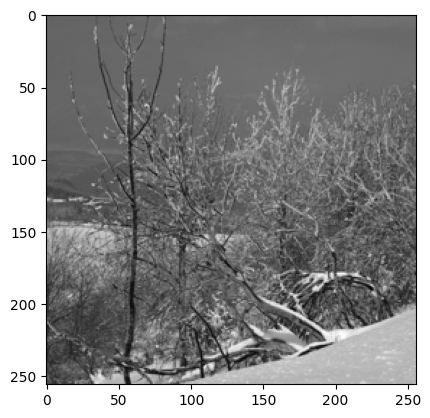

stego


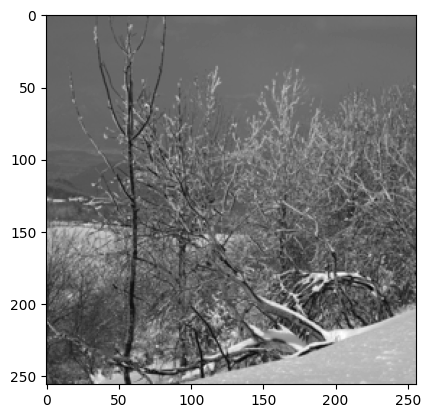

cover


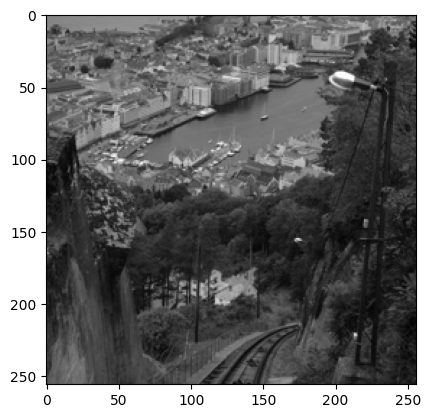

stego


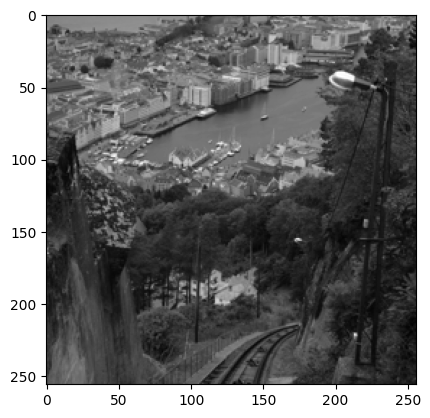

In [12]:
for i in range(1,3,1):
    plt.figure()
    print("cover")
    plt.imshow(X_test[i,:,:,0],cmap='gray')
    plt.show()
    plt.figure()
    print("stego")
    plt.imshow(X_test[1000+i,:,:,0],cmap='gray')
    plt.show()

In [13]:
model = GBRAS_Net()
model.summary()

Model GBRAS-Net Generated
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 30)         780       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 30)         90        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 256, 256, 30)         60        

In [14]:
train(model, X_train, y_train, X_valid, y_valid, X_test, y_test,
      batch_size=32, epochs=25, model_name="UERD04bpp")

Starting the training...
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 - 357s - loss: 0.6615 - accuracy: 0.5854 - val_loss: 0.6179 - val_accuracy: 0.6315 - 357s/epoch - 715ms/step
Epoch 2/25
500/500 - 345s - loss: 0.6116 - accuracy: 0.6437 - val_loss: 0.6162 - val_accuracy: 0.6315 - 345s/epoch - 691ms/step
Epoch 3/25
500/500 - 345s - loss: 0.5918 - accuracy: 0.6638 - val_loss: 0.6535 - val_accuracy: 0.5885 - 345s/epoch - 691ms/step
Epoch 4/25
500/500 - 336s - loss: 0.5882 - accuracy: 0.6594 - val_loss: 0.6856 - val_accuracy: 0.5595 - 336s/epoch - 672ms/step
Epoch 5/25
500/500 - 336s - loss: 0.5777 - accuracy: 0.6695 - val_loss: 0.6295 - val_accuracy: 0.5965 - 336s/epoch - 671ms/step
Epoch 6/25
500/500 - 336s - loss: 0.5735 - accuracy: 0.6818 - val_loss: 0.5918 - val_accuracy: 0.6490 - 336s/epoch - 671ms/step
Epoch 7/25
500/500 - 345s - loss: 0.5677 - accuracy: 0.6866 - val_loss: 0.5725 - val_accuracy: 0.6725 - 345s/epoch - 690ms/step
Epoch 8/25
500/500 - 345s - loss: 0.5615 - accuracy: 0.6882 - val_loss: 0.5673 - val_accuracy: 0.6765 - 345s/epoch 

{'loss': 0.3636377155780792, 'accuracy': 0.8684999942779541}

In [16]:
model.save('/content/drive/MyDrive/Dataset/Trained_Models/DATN.hdf5')

In [17]:
print(log_Dir
      )

/content/drive/MyDrive/Dataset/logs/UERD04bpp_2023-11-20_08-09-34


In [19]:
from tensorflow.keras.models import load_model


Train Accuracy 0.8080000281333923, epoch:25


Validation Accuracy 0.8069999814033508, epoch:25



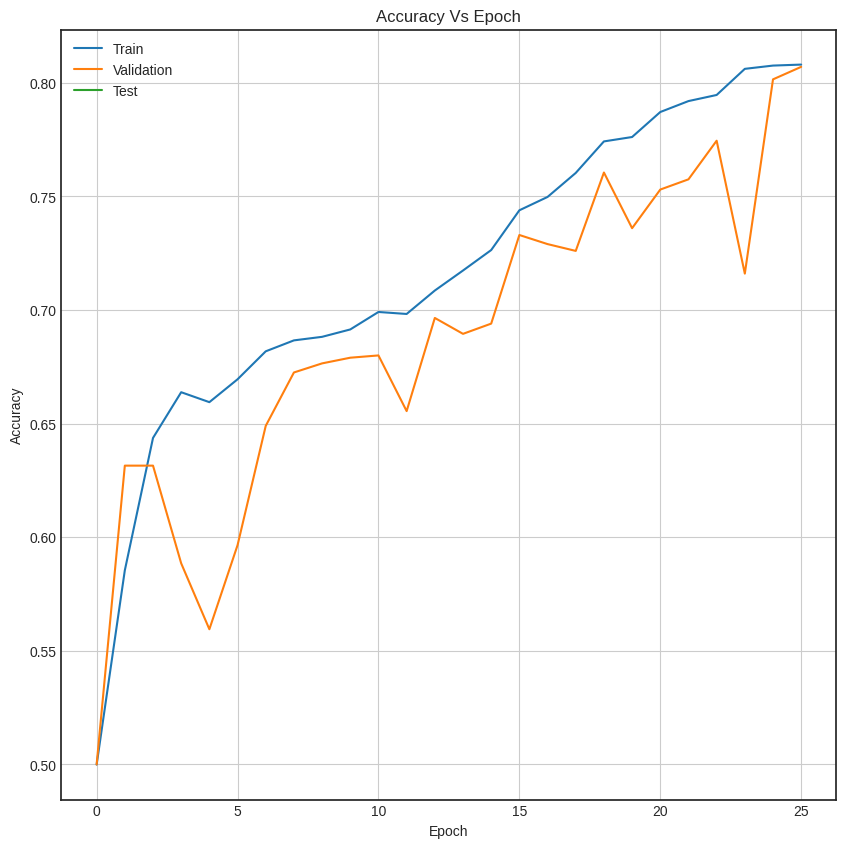

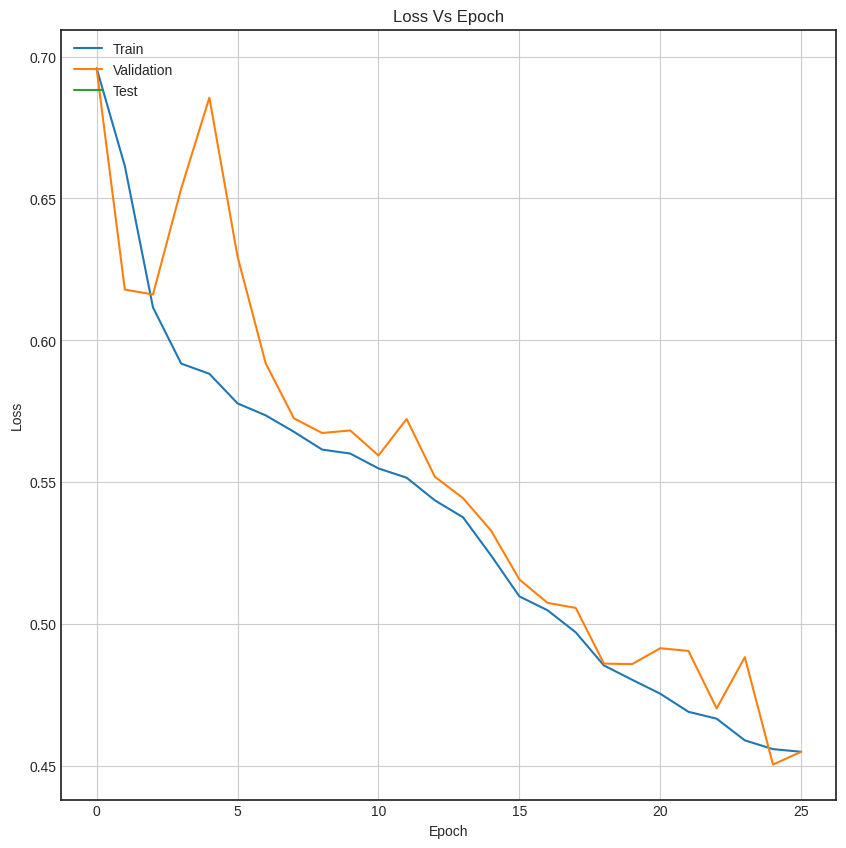

In [21]:
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)

In [37]:
import sys
sys.path.append('/content/drive/MyDrive/Dataset/')


In [39]:
import MV


In [44]:
classes = ['Cover', 'Stego']
name = 'GBRAS-Net'
path_to_save = "./images"
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)

63/63 [==============================] - 11s 166ms/step


<Axes: title={'center': 'Class Prediction Error for GBRAS-Net'}, xlabel='Actual Class', ylabel='Number of Predicted Class'>

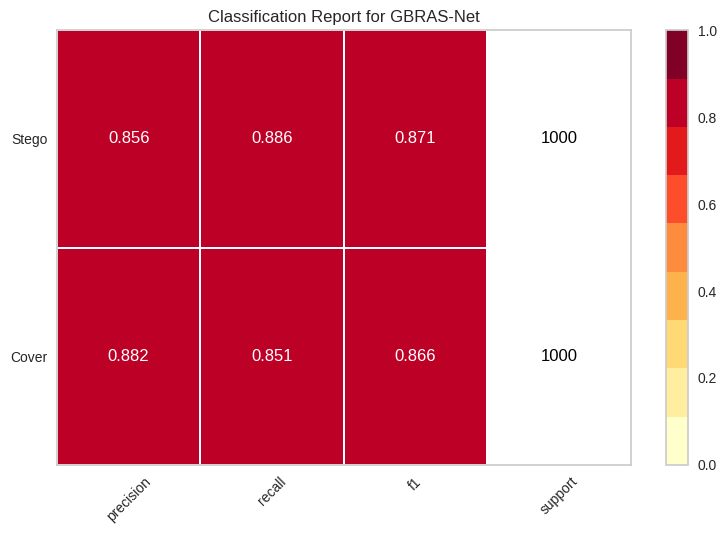

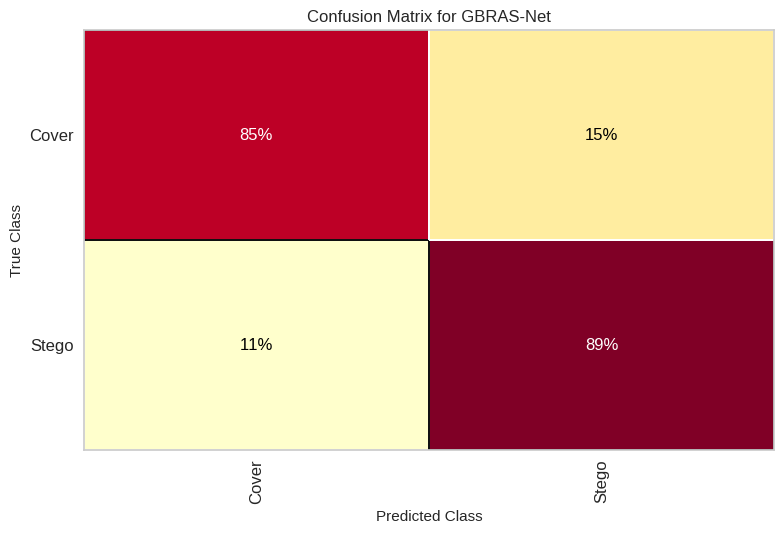

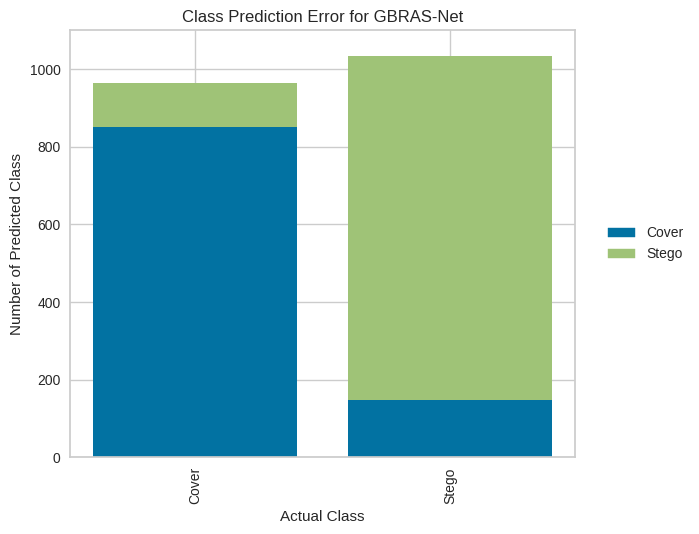

In [45]:
vz = MV.MetricsVisualizer(model,X_test,y_test,classes,name,path_to_save)
vz.ClassificationReportViz()
vz.ConfusionMatrixViz()
vz.ClassPredictionErrorViz()